In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
datamerge = mouse_data.merge(clinical_data, on="Mouse ID", how="left")

# Display the data table for preview
datamerge.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
#summary stats
datamerge.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 


tumor_response = datamerge.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)'] 

# Convert to DataFrame
df_tumor_response = (pd.DataFrame(data = tumor_response)).reset_index()

# Preview DataFrame
df_tumor_response.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = datamerge.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)'] 

# Convert to DataFrame
df_standard_error = (pd.DataFrame(standard_error)).reset_index()

# Preview DataFrame
df_standard_error.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
df_tumor_pvt = df_tumor_response.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
df_stderr_pvt = df_standard_error.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']


# Preview that Reformatting worked
df_tumor_pvt



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
#Create list of drugs to chart
drug_list = [('Capomulin','o','red', 'Capomulin'),('Infubinol','^','blue', 'Infubinol'),
                    ('Ketapril','s','green', 'Ketapril'),('Placebo','d','black', 'Placebo')]

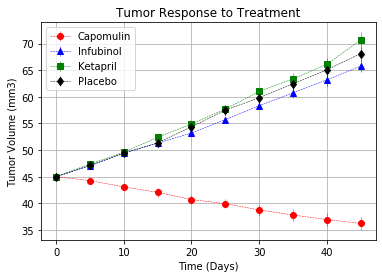

<Figure size 432x288 with 0 Axes>

In [7]:
#loop through drug list to plot
for drug,marker,colors, label in drug_list:
    stderr = df_stderr_pvt[drug]
    tumor_plt = plt.errorbar(df_tumor_pvt.index,df_tumor_pvt[drug],stderr,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5, label = label)
plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

# Save the Figure
plt.savefig('Response_to_Treatment.png')
        

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastic_site_mean = datamerge.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
# Convert to DataFrame
df_metastic_site_mean = (pd.DataFrame(data = metastic_site_mean)).reset_index()

# Preview DataFrame
df_metastic_site_mean.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastic_site_sem = datamerge.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
df_metastic_site_sem = (pd.DataFrame(data = metastic_site_sem)).reset_index()

# Preview DataFrame
df_metastic_site_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
df_metastic_mean_pvt = df_metastic_site_mean.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
df_metastic_sem_pvt = df_metastic_site_sem.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']

# Preview that Reformatting worked
df_metastic_mean_pvt.head()
#df_metastic_sem_pvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


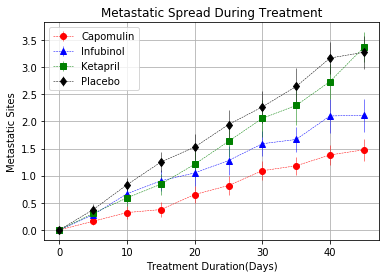

In [11]:
for drug,marker,colors, label in drug_list:
    metaerr = df_metastic_sem_pvt[drug]
    metastatic_plt = plt.errorbar(df_metastic_mean_pvt.index,df_metastic_mean_pvt[drug],metaerr,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5, label = label)
    
plt.legend(loc = 'best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Metastatic Sites')
x_lim = len(df_metastic_mean_pvt.index)
plt.grid()
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_grp = datamerge.groupby(['Drug', 'Timepoint'])['Mouse ID']
mice_count = mice_count_grp.nunique()

# Convert to DataFrame
df_mice_count = (pd.DataFrame(data = mice_count)).reset_index()
df_mice_count = df_mice_count.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
df_mice_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
df_mice_count_pvt = df_mice_count.pivot(index='Timepoint', columns='Drug')['Mouse Count']

# Preview the Data Frame
df_mice_count_pvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


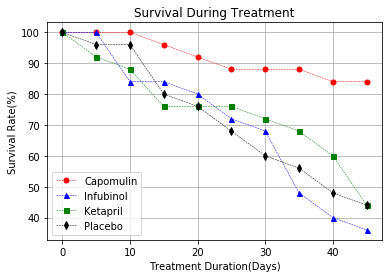

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors, label in drug_list:
    micetotal = df_mice_count_pvt[drug][0]
    Survival_plt = plt.plot(df_mice_count_pvt.index,df_mice_count_pvt[drug]/micetotal * 100,
                               color = colors, marker=marker, markersize = 5, ls='--',linewidth=0.5, label = label)

   
plt.legend(loc = 'best')
plt.title('Survival During Treatment')
plt.xlabel('Treatment Duration(Days)')
plt.ylabel('Survival Rate(%)')

plt.grid()
plt.show()

# Save the Figure
plt.savefig('Survival During Treatment.png')


## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
percent_change = (df_tumor_pvt.iloc[-1]/(df_tumor_pvt.iloc[0])-1)*100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

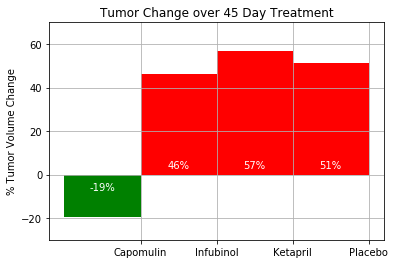

In [16]:
# Store all Relevant Percent Changes into a Tuple
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']

# Splice the data between passing and failing drugs
passing = percent_change < 0

# Orient widths. Add labels, tick marks, etc. 
change_list = [(percent_change[drug]) for drug in drug_list]
change_plt = plt.bar(drug_list, change_list, width = -1, align = 'edge', color = passing.map({True:'g', False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def label (changes):
   for change in changes:
        height = change.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(change.get_x() + change.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

# Call functions to implement the function calls
label(change_plt)

# Save the Figure
plt.savefig('Tumor Change over Treatment.png')

# Show the Figure
plt.show()

# Observations
Capomulin seems to be most effective
1.  Tumor Volume decreased over treatment period whereas there was an increase with the other drugs.
2.  Metastatic sites had a lower increase rate from the other drugs.
3.  Tumor change over a 45 day treatment was positive (decrease).